## Homework

The goal of this homework is to get familiar with MLflow, the tool for experiment tracking and 
model management.




## Q1. Install MLflow

To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-envs), and then install the package there with `pip` or `conda`.



In [223]:
!pip install mlflow

Once you installed the package, run the command `mlflow --version` and check the output.

### What's the version that you have?


In [251]:
!mlflow --version

mlflow, version 2.15.1





## Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the duration of each trip. 

Download the data for January, February and March 2023 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).



In [253]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet -P ~/Downloads/data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet -P ~/Downloads/data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet -P ~/Downloads/data

--2024-08-08 12:12:08--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.84.111.148, 52.84.111.30, 52.84.111.169, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.84.111.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘/Users/epam/Downloads/data/green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  3.39MB/s    in 0.4s    

2024-08-08 12:12:09 (3.39 MB/s) - ‘/Users/epam/Downloads/data/green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2024-08-08 12:12:09--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.84.111.148, 52.84.111.30, 52.84.111.169, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.ne

Use the script `preprocess_data.py` located in the folder [`homework`](homework) to preprocess the data.

The script will:

* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2023 data),
* save the preprocessed datasets and the `DictVectorizer` to disk.

Your task is to download the datasets and then execute this command:

```
python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
```
Tip: go to `02-experiment-tracking/homework/` folder before executing the command and change the value of `<TAXI_DATA_FOLDER>` to the location where you saved the data.


In [256]:
!python preprocess_data.py  --raw_data_path ~/Downloads/data --dest_path ~/Downloads/output

### How many files were saved to `OUTPUT_FOLDER`?

* 4


## Q3. Train a model with autolog

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder [`homework`](homework). 

The script will:

* load the datasets produced by the previous step,
* train the model on the training set,
* calculate the RMSE score on the validation set.

Your task is to modify the script to enable **autologging** with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked. 

Tip 1: don't forget to wrap the training code with a `with mlflow.start_run():` statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

### Train

In [297]:
!python train.py --data_path ~/Downloads/output

2024/08/08 13:03:09 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'


### What is the value of the `min_samples_split` parameter:

* 2

[Stackoverflow said](https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso) For DecisionTreeRegressor, you can see that min_samples_split and min_samples_leaf depend on your n_samples which is the number of rows. The documentation says the same thing for both parameters:

min_samples_split: int or float, default=2

The minimum number of samples required to split an internal node:

· If int, then consider min_samples_split as the minimum number.

· If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

As the documentation says, if you want to use the parameters making reference to the n_samples (as your teacher says to you), you have to use floats that will represent a fraction (between 0.0 and 1.0) of your number of samples.

For example if you want define min_sample_split is 100, you can write it with two ways: simply 100 or you using the float format 0.005 (you can see that 0.005*20060 is equal to 100).

Using floats allow you to use values that are independent of the number of samples. This is an advantage.

Anyway, I will tell you that probably you are not going to find some big improvements, since the default is super small.

This is applicable for min_sample_split and min_samples_leaf.



## Q4. Launch the tracking server locally

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry. 

Your task is to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called `artifacts` for the artifacts store.

You should keep the tracking server running to work on the next two exercises that use the server.

In addition to `backend-store-uri`, what else do you need to pass to properly configure the server?

* `default-artifact-root`




In [8]:
!mlflow ui --backend-store-uri sqlite:///mlflow.db --default-artifact-root ~/Downloads/artifacts --serve-artifacts 

[2024-08-08 13:38:25 +0300] [98703] [INFO] Starting gunicorn 22.0.0
[2024-08-08 13:38:25 +0300] [98703] [INFO] Listening at: http://127.0.0.1:5002 (98703)
[2024-08-08 13:38:25 +0300] [98703] [INFO] Using worker: sync
[2024-08-08 13:38:25 +0300] [98715] [INFO] Booting worker with pid: 98715
[2024-08-08 13:38:25 +0300] [98717] [INFO] Booting worker with pid: 98717
[2024-08-08 13:38:25 +0300] [98719] [INFO] Booting worker with pid: 98719
[2024-08-08 13:38:25 +0300] [98722] [INFO] Booting worker with pid: 98722
^C
[2024-08-08 14:09:56 +0300] [98703] [INFO] Handling signal: int
[2024-08-08 14:09:56 +0300] [98715] [INFO] Worker exiting (pid: 98715)
[2024-08-08 14:09:56 +0300] [98722] [INFO] Worker exiting (pid: 98722)
[2024-08-08 14:09:56 +0300] [98717] [INFO] Worker exiting (pid: 98717)
[2024-08-08 14:09:56 +0300] [98719] [INFO] Worker exiting (pid: 98719)


## Q5. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. 
We have prepared the script `hpo.py` for this exercise. 

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the `objective` function during the optimization,
* the RMSE obtained on the validation set (February 2023 data).






In [ ]:
!python hpo.py 

2024/08/08 16:10:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/5.

 98%|█████████▊| 49/50 [04:45<00:03,  3.98s/trial, best loss: 5.320408749882826]2024/08/08 16:10:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run dashing-snipe-587 at: http://127.0.0.1:5000/#/experiments/5/runs/e3abb377937a496abb9bd88f8478ca53.

2024/08/08 16:10:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/5.

100%|██████████| 50/50 [04:51<00:00,  5.82s/trial, best loss: 5.320408749882826]



### What's the best validation RMSE that you got?

* 5.335


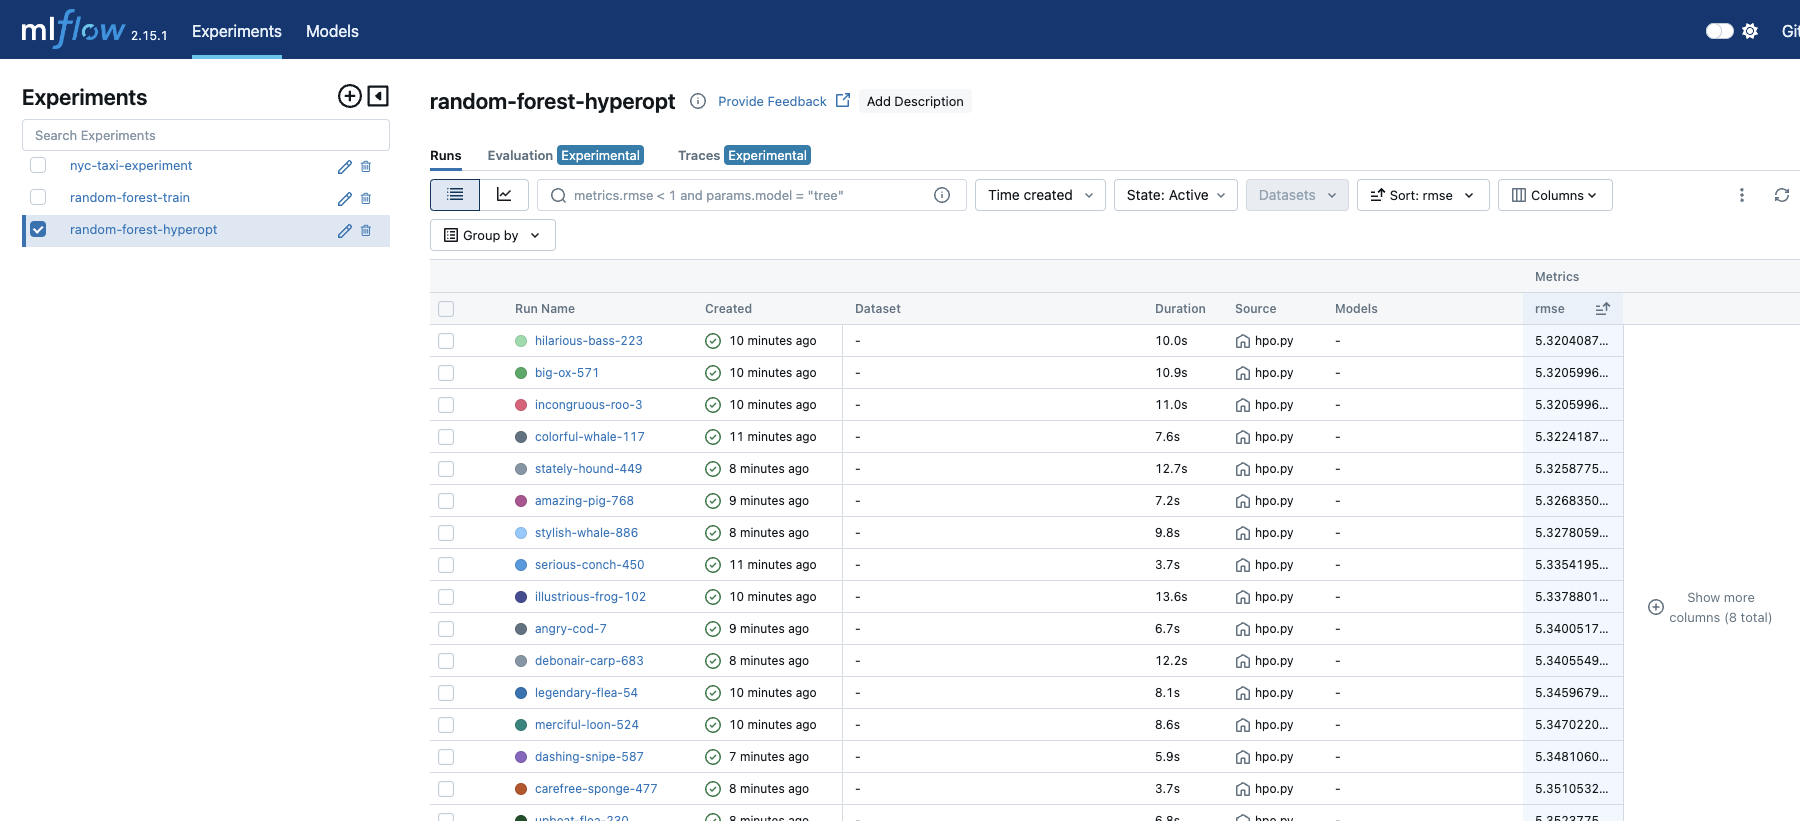

## Q6. Promote the best model to the model registry

The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. 
In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. 
After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called `random-forest-best-models`.

Your task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: `"runs:/<RUN_ID>/model"`, and the name of the model (make sure to choose a good one!).





In [ ]:
!python register_model.py

### What is the test RMSE of the best model?

* 5.567

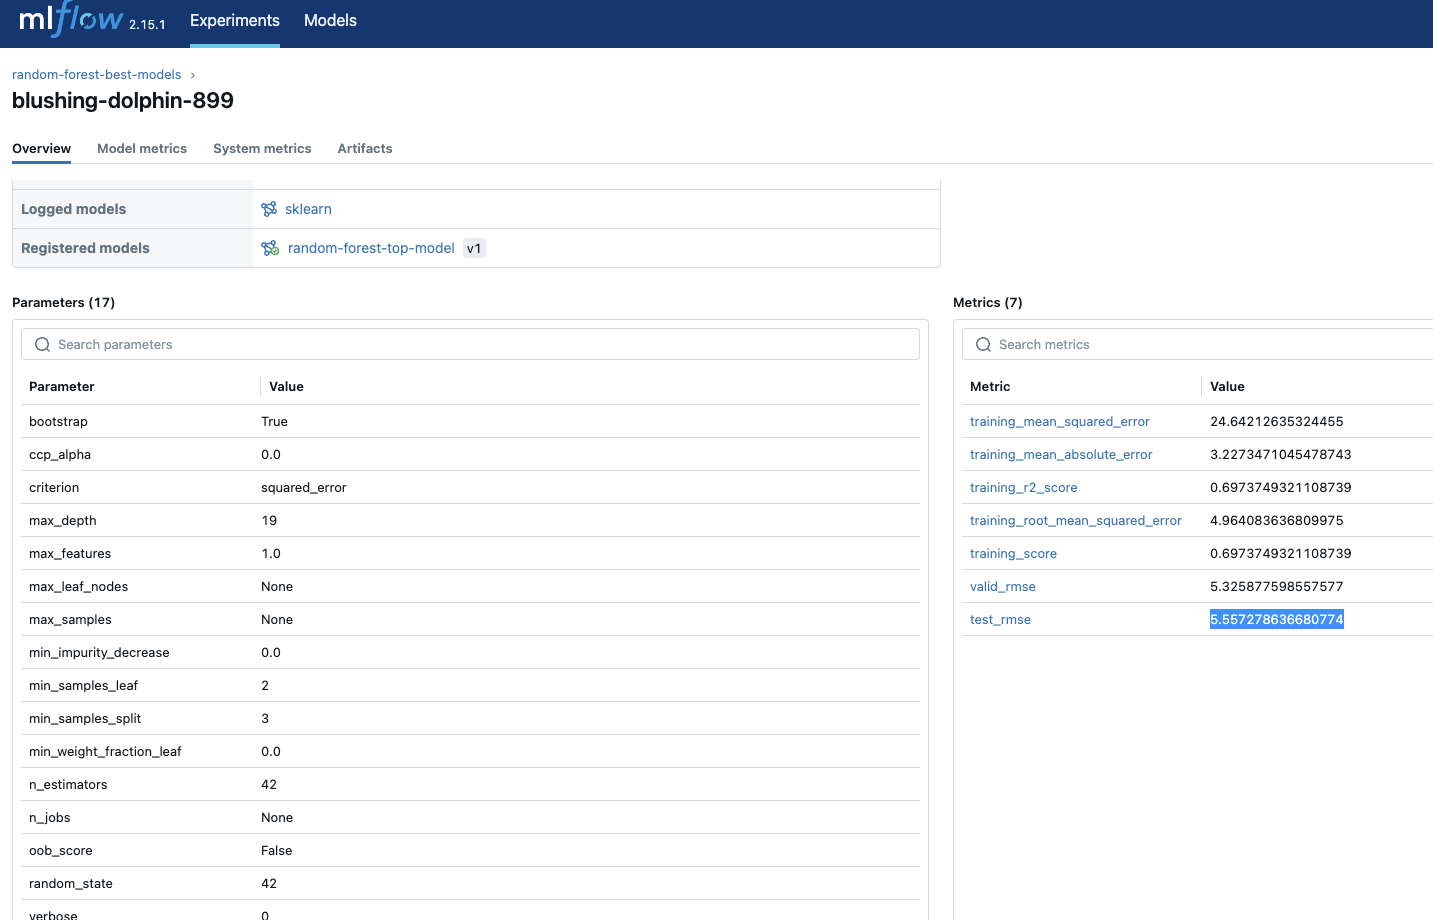


2024/08/08 16:28:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6.
Successfully registered model 'random-forest-top-model'.

2024/08/08 16:28:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: random-forest-top-model, version 1

Created version '1' of model 'random-forest-top-model'.


